            
<html>
<body>
<h1 style="font-family:verdana;">BENCHMARK SUR LE SNOWBALLEDGE</h1>


</body>
</html>

In [1]:
import numpy as np               
import matplotlib.pyplot as plt
import pandas as pd         
from pyspark import SparkContext as sc                      
import csv            
import time                                                            
import bitmath  
from datetime import datetime            
import seaborn as sns              
import statsmodels.api as sm              
from sklearn import linear_model       
import math                     
% matplotlib inline         
plt.style.use('ggplot')                                                     

In [2]:
df=pd.read_csv('/home/floranana/Documents/snowballedge/snowballedge.csv')         
df2=pd.read_csv('/home/floranana/Documents/snowballedge/fichier_video.csv')
df3=pd.read_csv('/home/floranana/Documents/snowballedge/file_interface.csv')     
                                                         
                          

In [3]:
df.head()       

,TAILLE,TEMPS,VITESSE_GiB_PAR_SECONDES,SECONDES,DEBIT_EN_MiB_PAR_SECONDE,VARIANCE,ECART-TYPE
0,148.0,00:37:17,NaN,NaN,NaN,NaN,NaN
1,148.0,00:37:14,NaN,NaN,NaN,NaN,NaN
2,148.0,00:36:48,NaN,NaN,NaN,NaN,NaN
3,148.0,00:36:42,NaN,NaN,NaN,NaN,NaN
4,148.0,00:36:33,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.head()     

,TAILLE,TEMPS,SECONDES,VTGIB,VTMIB
0,147.0,00:23:12,NaN,NaN,NaN
1,147.0,00:23:16,NaN,NaN,NaN
2,147.0,00:23:19,NaN,NaN,NaN
3,147.0,00:23:19,NaN,NaN,NaN
4,147.0,00:23:12,NaN,NaN,NaN


In [5]:
df3.head()     

,TAILLE,TEMPS,SECONDES,VTGIB,VTMIB
0,147.0,02:20:23,NaN,NaN,NaN
1,147.0,02:20:18,NaN,NaN,NaN
2,147.0,02:20:03,NaN,NaN,NaN
3,147.0,02:20:07,NaN,NaN,NaN
4,147.0,02:20:11,NaN,NaN,NaN


<html>
<body>
          
<h2 style="font-family:verdana;">CALCUL DE VITESSE MOYENNE EN GiB/s</h2>
<p style="font-family:courier;">On va calculer la vitesse chaque transfert et ensuite evaluer la vitesse moyenne de chaque categorie.</p>                       
 
</body>    
</html>


In [6]:
       df.shape                                           

(57, 7)

In [7]:
df.columns
             
 

Index(['TAILLE', 'TEMPS', 'VITESSE_GiB_PAR_SECONDES', 'SECONDES',
       'DEBIT_EN_MiB_PAR_SECONDE', 'VARIANCE', 'ECART-TYPE'],
      dtype='object')

       

<h3>Je fais une conversion du TEMPS en SECONDES</h3>


 




In [8]:
df = df [['TAILLE', 'TEMPS', 'VITESSE_GiB_PAR_SECONDES']] 
df['SECONDES']=df.apply( lambda r : (datetime.strptime(r.TEMPS,"%H:%M:%S") - \
                                         datetime(1900,1,1)).total_seconds(), axis=1)       

In [9]:
df2 = df2 [['TAILLE', 'TEMPS', 'VTGIB']] 
df2['SECONDES']=df2.apply( lambda r : (datetime.strptime(r.TEMPS,"%H:%M:%S") - \
                                         datetime(1900,1,1)).total_seconds(), axis=1)       

In [10]:
df3 = df3 [['TAILLE', 'TEMPS', 'VTGIB']] 
df3['SECONDES']=df3.apply( lambda r : (datetime.strptime(r.TEMPS,"%H:%M:%S") - \
                                         datetime(1900,1,1)).total_seconds(), axis=1)       

<h3>CALCUL DE LA VITESSE EN GiB/s</h3>
  

In [11]:
def f(x,y):
    return(x/y )             

In [12]:
df['VITESSE_GiB_PAR_SECONDES']=f(df.TAILLE,df.SECONDES)  
df2['VTGIB']=f(df2.TAILLE,df2.SECONDES)      
df3['VTGIB']=f(df3.TAILLE,df3.SECONDES)  

In [13]:
df.head() 

,TAILLE,TEMPS,VITESSE_GiB_PAR_SECONDES,SECONDES
0,148.0,00:37:17,0.066160,2237.0
1,148.0,00:37:14,0.066249,2234.0
2,148.0,00:36:48,0.067029,2208.0
3,148.0,00:36:42,0.067212,2202.0
4,148.0,00:36:33,0.067487,2193.0


In [14]:
def f(x):
    return(x*1024)

In [15]:
df['DEBIT_EN_MiB_PAR_SECONDE']=f(df['VITESSE_GiB_PAR_SECONDES']) 
df2['VTMIB']=f(df2['VTGIB']) 
df3['VTMIB']=f(df3['VTGIB'])  

In [16]:
df.head() 

,TAILLE,TEMPS,VITESSE_GiB_PAR_SECONDES,SECONDES,DEBIT_EN_MiB_PAR_SECONDE
0,148.0,00:37:17,0.066160,2237.0,67.747877
1,148.0,00:37:14,0.066249,2234.0,67.838854
2,148.0,00:36:48,0.067029,2208.0,68.637681
3,148.0,00:36:42,0.067212,2202.0,68.824705
4,148.0,00:36:33,0.067487,2193.0,69.107159


In [17]:
df2.head() 

,TAILLE,TEMPS,VTGIB,SECONDES,VTMIB
0,147.0,00:23:12,0.105603,1392.0,108.137931
1,147.0,00:23:16,0.105301,1396.0,107.828080
2,147.0,00:23:19,0.105075,1399.0,107.596855
3,147.0,00:23:19,0.105075,1399.0,107.596855
4,147.0,00:23:12,0.105603,1392.0,108.137931


<h3>CALCUL DE LA VITESSE PAR SERIE    </h3>
                  

In [18]:
df.groupby('TAILLE')['DEBIT_EN_MiB_PAR_SECONDE'].mean()          

TAILLE
5.0      108.002432
10.0     105.880778
25.0      73.288774
50.0      59.611454
100.0     73.615192
148.0     69.464546
Name: DEBIT_EN_MiB_PAR_SECONDE, dtype: float64

In [19]:
def moyenne(tableau):
    return sum(tableau, 0.0) / len(tableau)  

In [20]:
df['MOYENNE']=moyenne(df['DEBIT_EN_MiB_PAR_SECONDE']) 
df.head() 

,TAILLE,TEMPS,VITESSE_GiB_PAR_SECONDES,SECONDES,DEBIT_EN_MiB_PAR_SECONDE,MOYENNE
0,148.0,00:37:17,0.066160,2237.0,67.747877,80.25657
1,148.0,00:37:14,0.066249,2234.0,67.838854,80.25657
2,148.0,00:36:48,0.067029,2208.0,68.637681,80.25657
3,148.0,00:36:42,0.067212,2202.0,68.824705,80.25657
4,148.0,00:36:33,0.067487,2193.0,69.107159,80.25657


In [21]:
def variance(tableau):
    m=moyenne(tableau)
    return moyenne([(x-m)**2 for x in tableau]) 
               

In [22]:
df['VARIANCE']=variance(df['DEBIT_EN_MiB_PAR_SECONDE']) 
 

In [23]:
def ecartype(tableau):
    return variance(tableau)**0.5     


In [24]:
df['ECART-TYPE']=ecartype(df['DEBIT_EN_MiB_PAR_SECONDE'])     
df.head()     

,TAILLE,TEMPS,VITESSE_GiB_PAR_SECONDES,SECONDES,DEBIT_EN_MiB_PAR_SECONDE,MOYENNE,VARIANCE,ECART-TYPE
0,148.0,00:37:17,0.066160,2237.0,67.747877,80.25657,367.66838,19.174681
1,148.0,00:37:14,0.066249,2234.0,67.838854,80.25657,367.66838,19.174681
2,148.0,00:36:48,0.067029,2208.0,68.637681,80.25657,367.66838,19.174681
3,148.0,00:36:42,0.067212,2202.0,68.824705,80.25657,367.66838,19.174681
4,148.0,00:36:33,0.067487,2193.0,69.107159,80.25657,367.66838,19.174681


In [25]:
df2.groupby('TAILLE')['VTMIB'].mean() 

TAILLE
5.0       73.552581
10.0      86.537145
15.0      95.513351
20.0      97.671784
25.0     101.400861
30.0     102.498547
35.0     102.924952
40.0     105.083102
45.0     104.896110
55.0     102.590087
60.0     104.888965
75.0     105.845341
80.0     106.245375
91.0     108.606385
116.0    106.420522
131.0    107.521957
147.0    107.967701
Name: VTMIB, dtype: float64

In [26]:
df3.groupby('TAILLE')['VTMIB'].mean()   

TAILLE
116.0     6.113114
131.0    14.484502
147.0    17.897046
Name: VTMIB, dtype: float64

In [27]:
df.groupby('TAILLE')['SECONDES'].mean()  

TAILLE
5.0        47.428571
10.0       98.800000
25.0      355.000000
50.0      862.500000
100.0    1392.700000
148.0    2182.700000
Name: SECONDES, dtype: float64

In [28]:
graphe=df.groupby('TAILLE')['DEBIT_EN_MiB_PAR_SECONDE'].mean() 
graphe1=df2.groupby('TAILLE')['VTMIB'].mean()  


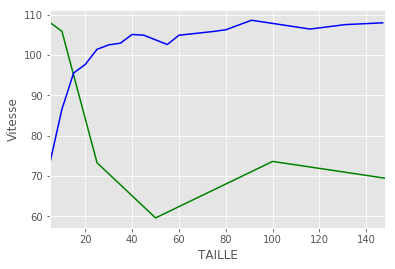

In [29]:
graphe.plot(color='green')
graphe1.  plot(color='blue')
plt.ylabel('Vitesse')            


   <h2>PREDICTION</h2>      

<h4>Courbe de la taille du fichier transféré en fonction du temps en secondes</h4>       

In [30]:
graphe1=df.groupby('TAILLE')['SECONDES'].mean()                 

<p>on affiche le nuage de point donc je dispose</p>                 

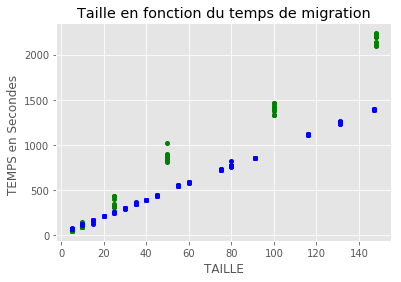

In [31]:

plt.plot(df['TAILLE'], df['SECONDES'], 'ro', markersize=4, color='green',label='fichier vide' ) 
plt.plot(df2['TAILLE'], df2['SECONDES'], 'ro', markersize=4, color='blue', label='fichier vidéo x*1.6G')  
#plt.plot(df3['TAILLE'], df3['SECONDES'], 'ro', markersize=4, color='violet',ax=axes[0,1]) 
plt.title('Taille en fonction du temps de migration') 
plt.xlabel('TAILLE')   
plt.ylabel('TEMPS en Secondes ')         
plt.show()           

<h3>REGRESSION à une VARIABLE avec seaborn  </h3>       

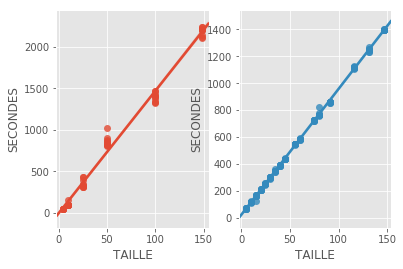

In [32]:
fig, axs = plt.subplots(ncols=2)
sns.set(style="white", color_codes=True)
sns.regplot(x="TAILLE", y="SECONDES", data= df,ax=axs[0] );
sns.regplot(x="TAILLE", y="SECONDES", data= df2,ax=axs[1] );  


<h3> Regression en utilisant scikit-learn

</h3>

<p> on parle de regression quand il s   agit de formaliser la relation moyenne qui existe entre la taille et le temps'</p>

In [46]:
X = df2[["TAILLE"]]
y = df2  ["SECONDES"]       

# On fit le modele 
model = linear_model.LinearRegression()       
results = model.fit(X, y)

In [47]:
print(results.intercept_, results.coef_)

21.7973567576 [ 9.35463769]


<p>La meilleure approximation linéaire est donc y=a+bx avec : a=-4.13882848772  -b=14.70576916

Mais en termes de présentation de résultats, c’est un peu limité… Pas de standard errors, pas de R^2 etc (du moins pas automatiquement)

</p>                 

<h2> Regression en utilisant statsmodels</h2>          

In [48]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               SECONDES   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.201e+05
Date:                Mon, 08 Jan 2018   Prob (F-statistic):          6.77e-279
Time:                        23:29:35   Log-Likelihood:                -709.51
No. Observations:                 170   AIC:                             1421.
Df Residuals:                     169   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TAILLE         9.6023      0.017    565.752      0.0

<h5>Si vous regardez de plus près, vous observez que les coefficients des deux régressions sont proches mais pas égaux.----->                   

Il faut faire attention avec statsmodels, il n’inclut pas de lui-même un intercept (\beta_0) alors que scikit learn le fait.

</h5>

In [50]:
X = df2["TAILLE"]
X = np.vander(X, 2) #ici on ajoute
y = df2 ["SECONDES"]
model = sm.OLS(y, X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               SECONDES   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.095e+05
Date:                Mon, 08 Jan 2018   Prob (F-statistic):          2.98e-276
Time:                        23:30:28   Log-Likelihood:                -616.92
No. Observations:                 170   AIC:                             1238.
Df Residuals:                     168   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.3546      0.017    556.368      0.0

<h2> ESTIMATION DU TEMPS NECESSAIRE POUR TRANFORMER 17TiB sachant que 1TiB =1024GiB</h2>

In [37]:
def f(a):
    a=a*1024
            
    return(a)     

In [38]:
f(17)            

17408

<p>calcul du temps de migration</p> 
        

In [39]:
def temps(taille):
    seconde =14.70576916*taille -4.13882848772 
    return(seconde ) 

In [40]:
temps(17408)  

255993.89070879226

In [41]:
heure,minute=0,0
 
def decoupe(seconde):
    heure = seconde /3600
    seconde %= 3600
    minute = seconde/60
    seconde%=60
    return (heure,minute,seconde)
 


In [42]:
decoupe(  255993.89070879226)

(71.10941408577563, 6.564845146537603, 33.89070879225619)

In [43]:
  def converti(heure):
        jour=heure/24    
        return(jour)

In [44]:
converti(71.10941408577563)          

2.9628922535739846

In [45]:
# soit environ 3jours et demi pour migrer 17 Tebibytes